In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('hotel_bookings.csv')
# df.head()
# df.tail()
# df.info()
df.shape


(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
filter1=(df['children']==0)&(df['adults']==0)&(df['babies']==0)
filter1

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [7]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [8]:
df[filter1].shape

(180, 32)

In [9]:
df[~filter1].shape

(119210, 32)

In [10]:
df2=df[~filter1]
df2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119210, dtype: bool

In [11]:
type(df2.duplicated())

pandas.core.series.Series

In [12]:
df2.duplicated().sum()

np.int64(31980)

In [13]:
data=df2.drop_duplicates()
data.shape

(87230, 32)

In [14]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

data[('lead_time','total_of_special_requests','adr')]

In [15]:
data[['lead_time','total_of_special_requests','adr']].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


In [17]:
data.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [19]:
for col in ['lead_time','total_of_special_requests','adr']:
    print('feature name:{}'.format(col))
    for i in range(90,101,1):
        quantile_value=np.quantile(data[col],q=1/100)
        print('{}th quantile value is {}'.format(i,quantile_value))
    print('\n')    

feature name:lead_time
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0


feature name:total_of_special_requests
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0


feature name:adr
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0




In [20]:
not_canceled=data[data['is_canceled']==0]
not_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [21]:
country_wise_data=not_canceled['country'].value_counts().reset_index()

In [22]:
country_wise_data.columns=['country','No of guests']
country_wise_data

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,KIR,1
161,ATF,1
162,TJK,1
163,SLE,1


In [48]:
!pip install chart.studio


   -------------------- ------------------- 1/2 [chart.studio]
   ---------------------------------------- 2/2 [chart.studio]



In [49]:
!pip install plotly

In [23]:
import chart_studio.plotly as py

import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [24]:
map_guest=px.choropleth(data_frame=country_wise_data,
          locations=country_wise_data['country'],
          color=country_wise_data['No of guests'],
          hover_name=country_wise_data['country'],
          title='Home country of Guests'
        )      
map_guest.show()

In [25]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [26]:
pivot=pd.crosstab(index=data['reserved_room_type'],columns=data['assigned_room_type'],margins=True)
pivot


assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,All
reserved_room_type,,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0,56436
B,106,872,0,5,2,2,8,0,0,1,0,996
C,5,2,866,6,4,2,10,9,10,0,0,914
D,295,27,32,15979,657,199,82,9,67,29,0,17376
E,15,2,6,22,5458,383,97,4,40,9,0,6036
F,6,14,0,4,31,2636,113,3,10,3,0,2820
G,5,1,2,0,4,14,1999,7,15,3,0,2050
H,0,0,0,1,0,0,10,579,6,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,6


In [59]:
pivot_normalize=pd.crosstab(index=data['reserved_room_type'],columns=data['assigned_room_type'],margins=True,normalize='index').round(2)*100
pivot_normalize

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


In [27]:
data['market_segment'].value_counts()
data['market_segment'].value_counts().values

array([51553, 13855, 11780,  4922,  4200,   692,   226,     2])

In [28]:
data['market_segment'].value_counts().index

Index(['Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'],
      dtype='object', name='market_segment')

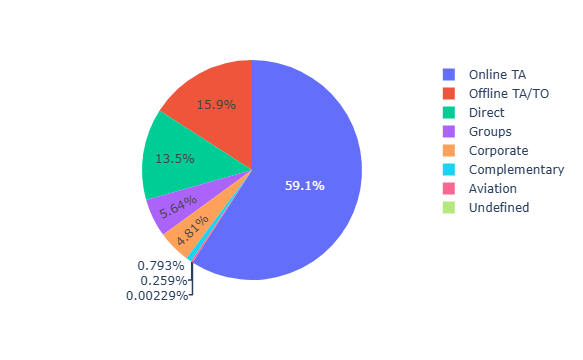

In [29]:
fig=px.pie(data,values=data['market_segment'].value_counts().values,
      names=data['market_segment'].value_counts().index)
fig.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2968\2587381998.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='market_segment', ylabel='adr'>

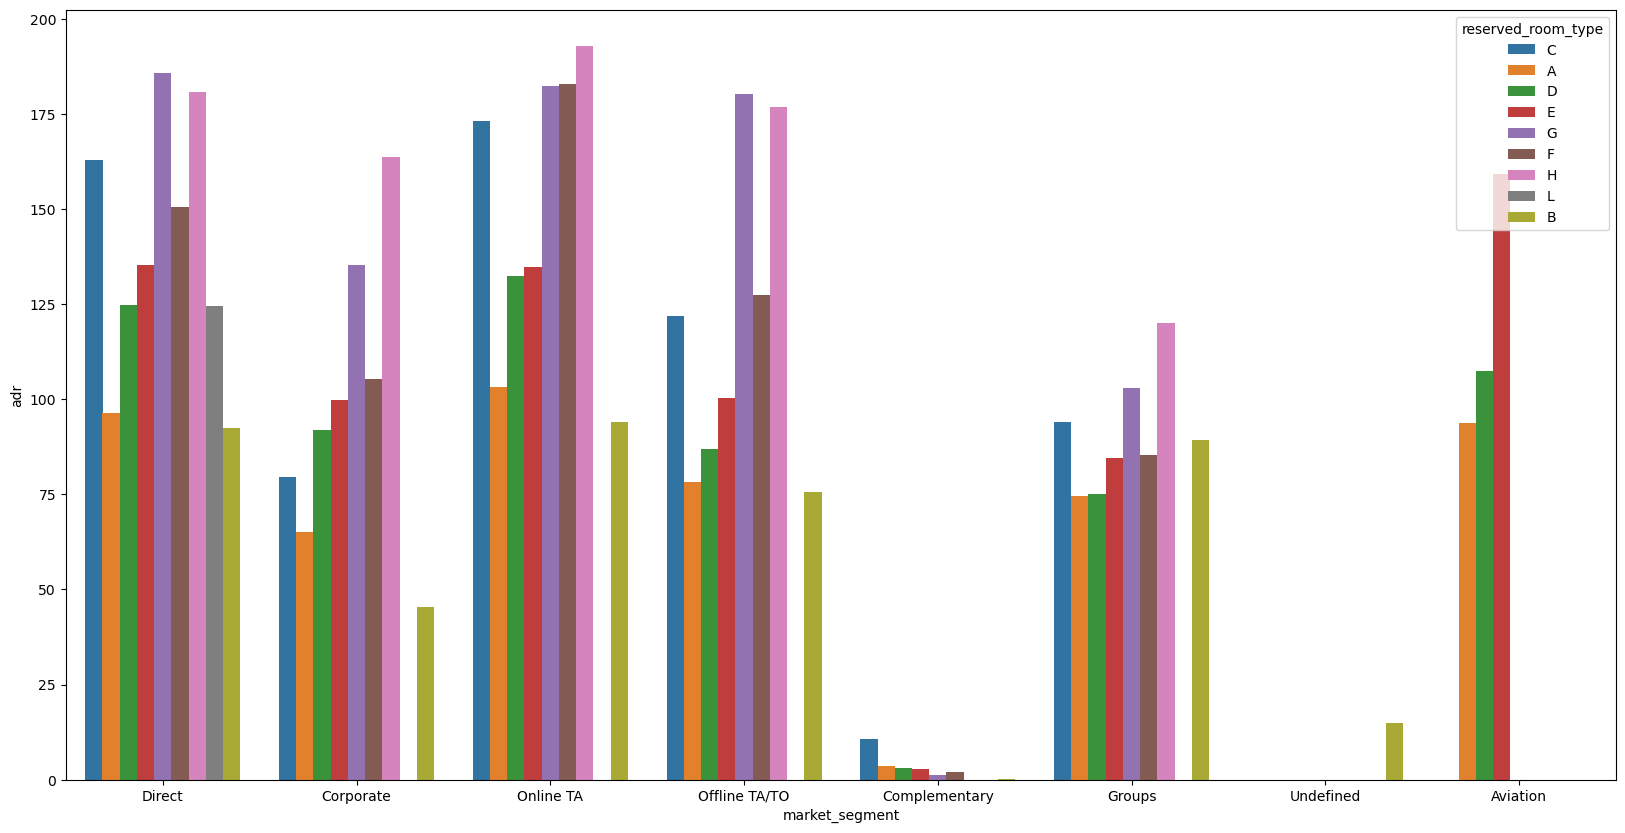

In [69]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(x='market_segment',y='adr',hue='reserved_room_type',data=data,ci=None)

In [30]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [31]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [35]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
dict_month={'July':7,'August':8,'September':9,'October':10,'November':11,'December':12,'January':1,
           'February':2,'March':3,'April':4,'May':5,'June':6}
data['arrival_date_month_index']=data['arrival_date_month'].map(dict_month)
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index'],
      dtype='object')

In [36]:
data[['arrival_date_year',
      'arrival_date_month_index','arrival_date_day_of_month'
]]


,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1
...,...,...,...
119385,2017,8,30
119386,2017,8,31
119387,2017,8,31
119388,2017,8,31


In [46]:
data['arrival_date']=data['arrival_date_year'].astype(str)+'-'+ data['arrival_date_month_index'].astype(str)+'-'+ data['arrival_date_day_of_month'].astype(str)

In [47]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_index,Total_guests,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2.0,2015-7-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2.0,2015-7-1


In [39]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index'],
      dtype='object')

In [40]:
data[['adults', 'children', 'babies']]

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [48]:
data['Total_guests']=data['adults']+data['children']+data['babies']
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_index,Total_guests,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2.0,2015-7-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2.0,2015-7-1


In [49]:
data[['arrival_date','Total_guests']]

,arrival_date,Total_guests
0,2015-7-1,2.0
1,2015-7-1,2.0
2,2015-7-1,1.0
3,2015-7-1,1.0
4,2015-7-1,2.0
...,...,...
119385,2017-8-30,2.0
119386,2017-8-31,3.0
119387,2017-8-31,2.0
119388,2017-8-31,2.0


In [58]:
guest_arrival_series=dataNoCancel.groupby(['arrival_date'])['Total_guests'].sum()
guest_arrival_series

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: Total_guests, Length: 793, dtype: float64

In [55]:
dataNoCancel=data[data['is_canceled']==0]

<Axes: xlabel='arrival_date'>

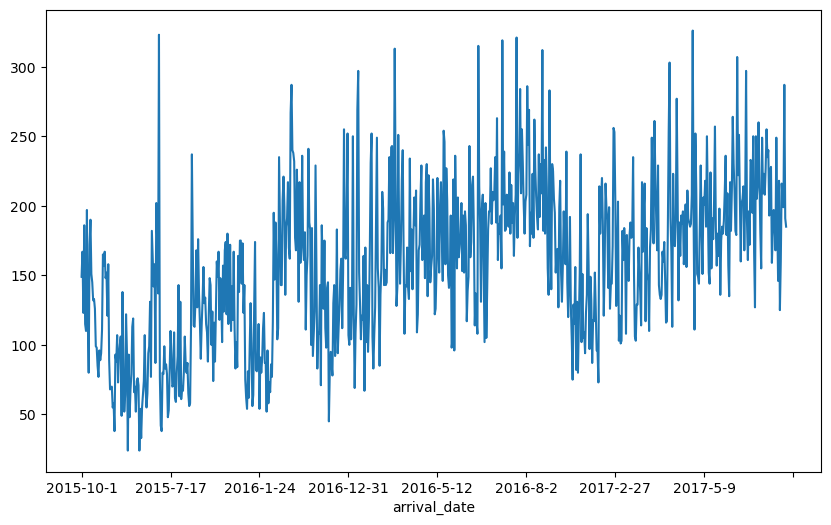

In [61]:
guest_arrival_series.plot(figsize=(10,6))

In [ ]:
# 8.. Analysing distribution of "guest arrival"

In [62]:
guest_arrival_series

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: Total_guests, Length: 793, dtype: float64

<Axes: ylabel='Density'>

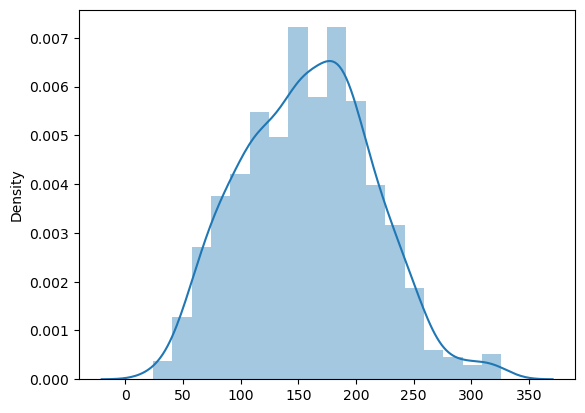

In [65]:
import seaborn as sns
sns.distplot(guest_arrival_series.values)

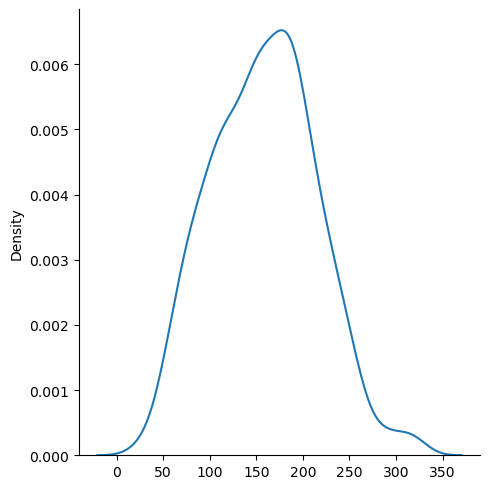

In [66]:
sns.displot(guest_arrival_series.values,kind='kde')

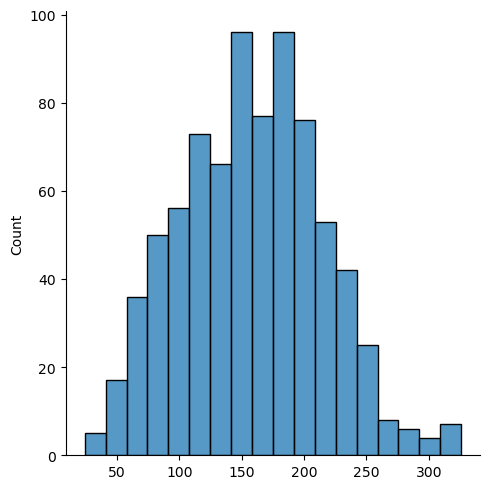

In [67]:
sns.displot(guest_arrival_series.values)

In [68]:
np.mean(guest_arrival_series.values)

np.float64(157.92559899117276)

In [69]:
np.median(guest_arrival_series.values)

np.float64(158.0)

In [70]:
np.std(guest_arrival_series.values)

np.float64(56.48263702610786)